In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.shape

(18249, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [24]:
df['total_sale_unit'] = df['4046'] + df['4225'] + df ['4770']
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['month'] = pd.DatetimeIndex(df['Date']).month
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month_year,month,total_sale_unit
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12,55539.75
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12,45371.42
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12,110074.87
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12,73180.99
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11,44855.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02,2,3576.16
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01,1,4623.20
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01,1,4372.65
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01,1,5235.68


In [10]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [11]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# EDA

### Distribution Graph of Avocado Price (Normality ?) 

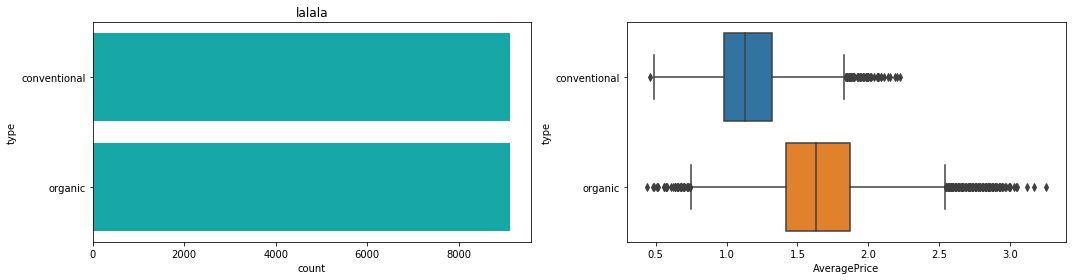

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))

sns.countplot(y="type", data = df, color="c", ax = axs[0]).set_title('lalala')

sns.boxplot(y="type", x="AveragePrice", data = df, ax = axs[1])

plt.tight_layout()

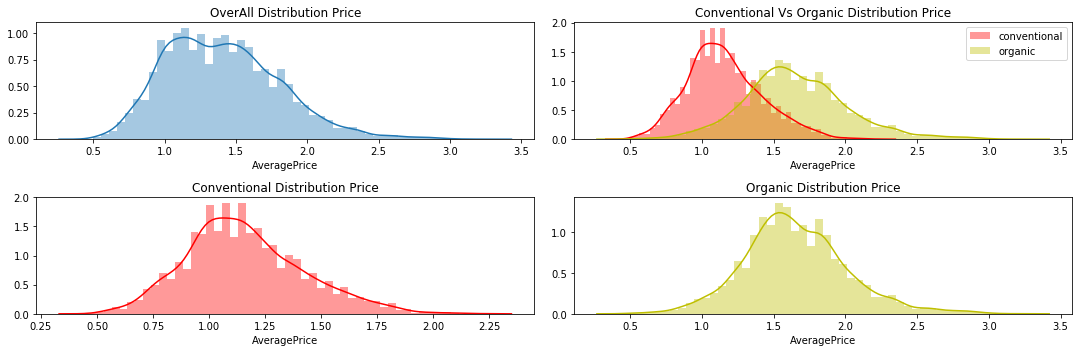

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,5))

sns.distplot(df["AveragePrice"],ax = axs[0,0]).set_title("OverAll Distribution Price")


sns.distplot(df.loc[df['type'] == 'conventional']["AveragePrice"],color = 'r',ax = axs[0,1], label = 'conventional')
sns.distplot(df.loc[df['type'] == 'organic']["AveragePrice"],color = 'y',ax = axs[0,1],label = 'organic'
            ).set_title('Conventional Vs Organic Distribution Price')
axs[0,1].legend()

sns.distplot(df.loc[df['type'] == 'conventional']["AveragePrice"],color = 'r',ax = axs[1,0]
            ).set_title('Conventional Distribution Price')

sns.distplot(df.loc[df['type'] == 'organic']["AveragePrice"],color = 'y',ax = axs[1,1]
            ).set_title('Organic Distribution Price')

plt.tight_layout()

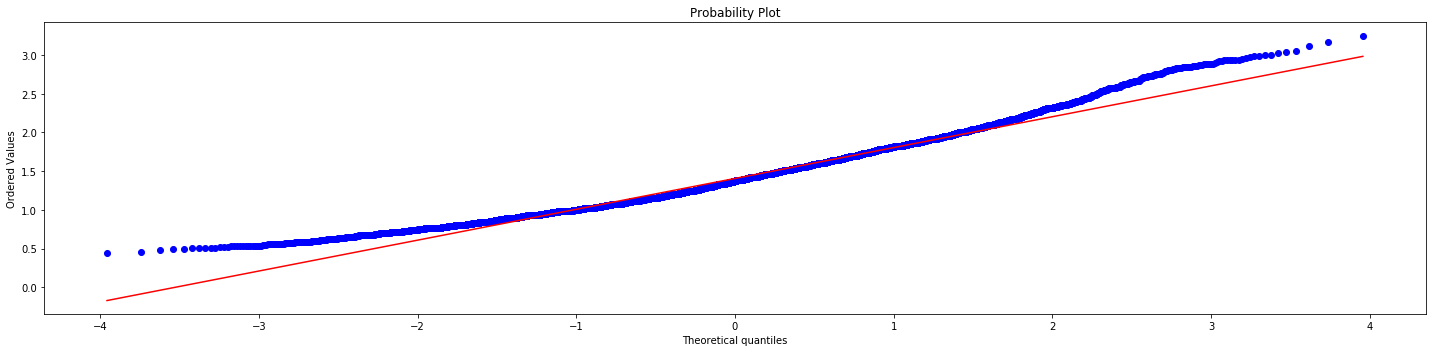

Shapiro-Wilk Test:  (0.9917729496955872, 2.2772759621147998e-05)


In [14]:
from scipy import stats
import statsmodels.api as sm
plt.figure(figsize = (20,5))
stats.probplot(df["AveragePrice"], dist="norm", plot = plt)
plt.tight_layout()
plt.show()

print("Shapiro-Wilk Test: ", stats.shapiro(df["AveragePrice"][0:1000]))

### Date vs Average price

In [15]:
conventional_price = df.loc[df['type'] == 'conventional',['Date','AveragePrice']].sort_values(by = 'Date')
conventional_price  = conventional_price.set_index('Date')
conventional_price.index = pd.to_datetime(conventional_price.index)
display(conventional_price.head())


organic_price = df.loc[df['type'] == 'organic',['Date','AveragePrice']].sort_values(by = 'Date')
organic_price  = organic_price.set_index('Date')
organic_price.index = pd.to_datetime(organic_price.index)
display(organic_price.head())

,AveragePrice
Date,
2015-01-04,0.93
2015-01-04,1.10
2015-01-04,0.98
2015-01-04,1.40
2015-01-04,0.80


,AveragePrice
Date,
2015-01-04,1.24
2015-01-04,1.50
2015-01-04,1.12
2015-01-04,1.73
2015-01-04,1.30


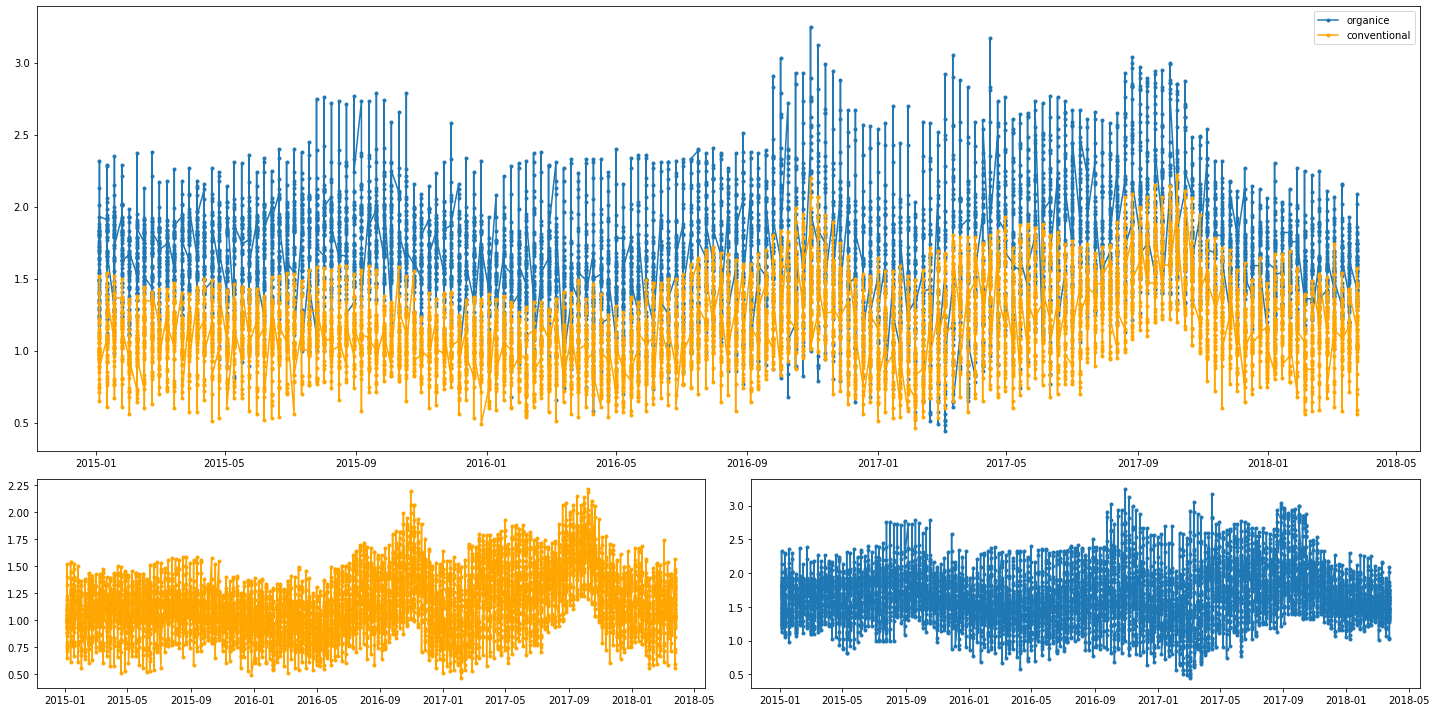

In [16]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (20,10))
gridspec.GridSpec(3,2)

plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=2)
plt.gca()
plt.plot(organic_price, marker='.',label = "organice")
plt.plot(conventional_price, marker='.', label = 'conventional',color = 'orange')
plt.legend()

plt.subplot2grid((3,2), (2,0))
plt.gca()
plt.plot(conventional_price, marker='.',color = 'orange')

plt.subplot2grid((3,2), (2,1))
plt.gca()
plt.plot(organic_price, marker='.')

plt.tight_layout()
plt.show()

In [17]:
conventional_averageprice = df.loc[df['type'] == 'conventional',['Date','AveragePrice']].sort_values(by = 'Date')
conventional_averageprice = conventional_averageprice.set_index('Date')
conventional_averageprice = conventional_averageprice.groupby(by = "Date").median()
conventional_averageprice.index = pd.to_datetime(conventional_averageprice.index)
display(conventional_averageprice.head())


organic_averageprice = df.loc[df['type'] == 'organic',['Date','AveragePrice']].sort_values(by = 'Date')
organic_averageprice = organic_averageprice.set_index('Date')
organic_averageprice = organic_averageprice.groupby(by = "Date").median()
organic_averageprice.index = pd.to_datetime(organic_averageprice.index)
display(organic_averageprice.head())


,AveragePrice
Date,
2015-01-04,1.000
2015-01-11,1.100
2015-01-18,1.145
2015-01-25,1.150
2015-02-01,0.940


,AveragePrice
Date,
2015-01-04,1.615
2015-01-11,1.670
2015-01-18,1.730
2015-01-25,1.690
2015-02-01,1.550


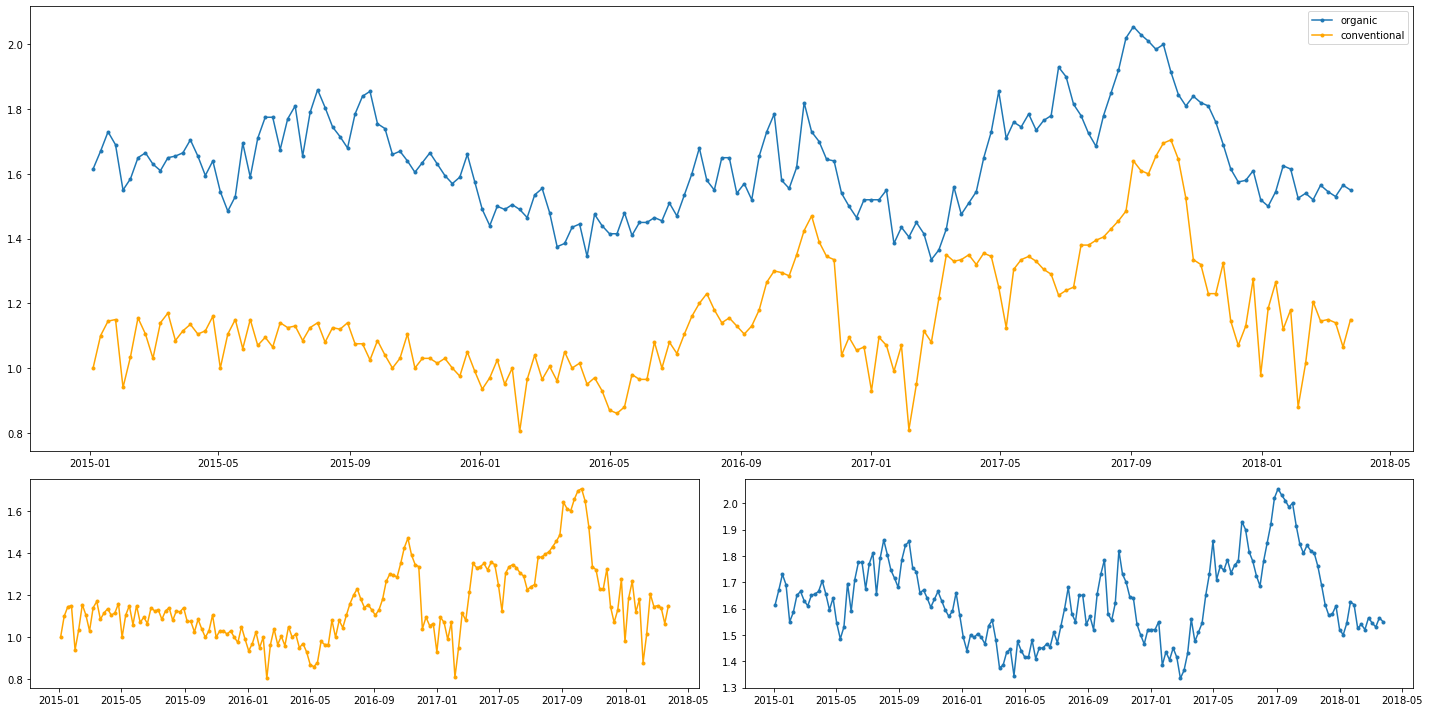

In [18]:
fig = plt.figure(figsize = (20,10))
gridspec.GridSpec(3,2)

plt.subplot2grid((3,2), (0,0), colspan=2, rowspan=2)
plt.gca()
plt.plot(organic_averageprice, marker='.',label = "organic")
plt.plot(conventional_averageprice, marker='.', label = 'conventional',color = 'orange')
plt.legend()

plt.subplot2grid((3,2), (2,0))
plt.gca()
plt.plot(conventional_averageprice, marker='.',color = 'orange')

plt.subplot2grid((3,2), (2,1))
plt.gca()
plt.plot(organic_averageprice, marker='.')

plt.tight_layout()
plt.show()


### Which one sell the most small (4046), medium (4225) or larger (4770)? 

In [19]:
small = df[['Date','4046']]
medium = df[['Date','4225']]
large = df[['Date','4770']]

size = [small, medium, large]

In [20]:
def size_sale_plot(size) -> None:
    
    type_size = size.set_index('Date')
    type_size = type_size.groupby(by = "Date").median()
    type_size.index = pd.to_datetime(type_size.index)
    plt.gca()
    plt.plot(type_size, marker='.', label = size.columns[1])
    plt.legend()
    

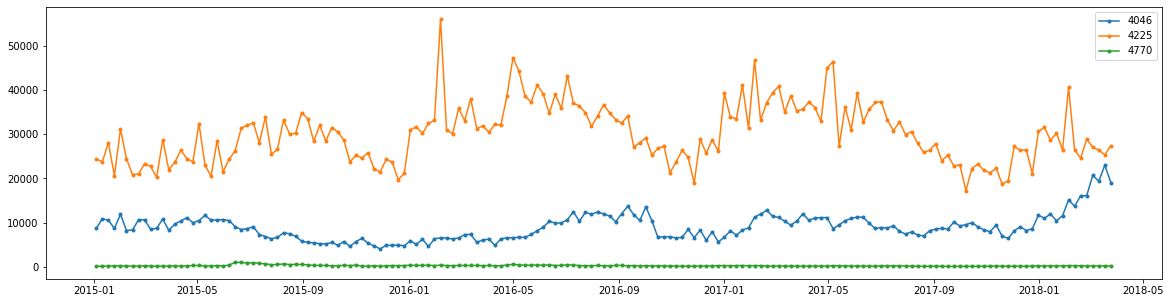

In [21]:
plt.figure(figsize = (20,5))
for i in size:
    size_sale_plot(i)

### Which one sell more conventional or organic?

In [39]:
conventional_unit = df.loc[df['type'] == 'conventional',['Date','total_sale_unit']]
organic_unit = df.loc[df['type'] == 'organic',['Date','total_sale_unit']]

unit = [conventional_unit,organic_unit]


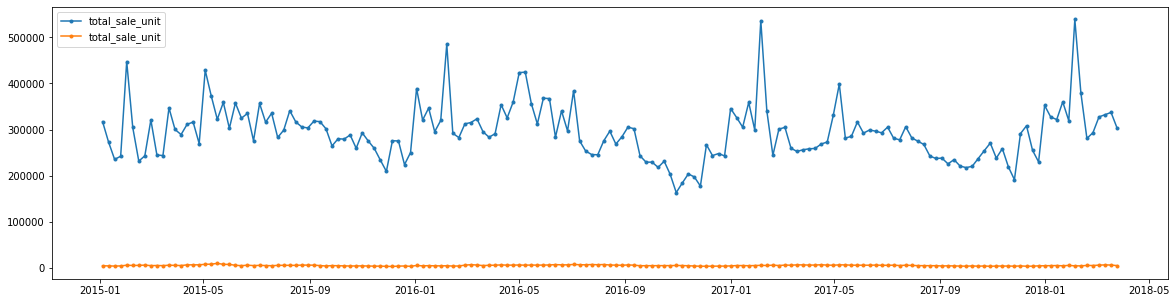

In [41]:
plt.figure(figsize = (20,5))
for i in unit:
    size_sale_plot(i)

In [43]:
organic_unit

,Date,total_sale_unit
9126,2015-12-27,96.75
9127,2015-12-20,202.38
9128,2015-12-13,189.14
9129,2015-12-06,194.47
9130,2015-11-29,94.73
...,...,...
18244,2018-02-04,3576.16
18245,2018-01-28,4623.20
18246,2018-01-21,4372.65
18247,2018-01-14,5235.68


# Region 

In [25]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month_year,month,total_sale_unit
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015-12,12,55539.75
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015-12,12,45371.42
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015-12,12,110074.87
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015-12,12,73180.99
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015-11,11,44855.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018-02,2,3576.16
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018-01,1,4623.20
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018-01,1,4372.65
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018-01,1,5235.68


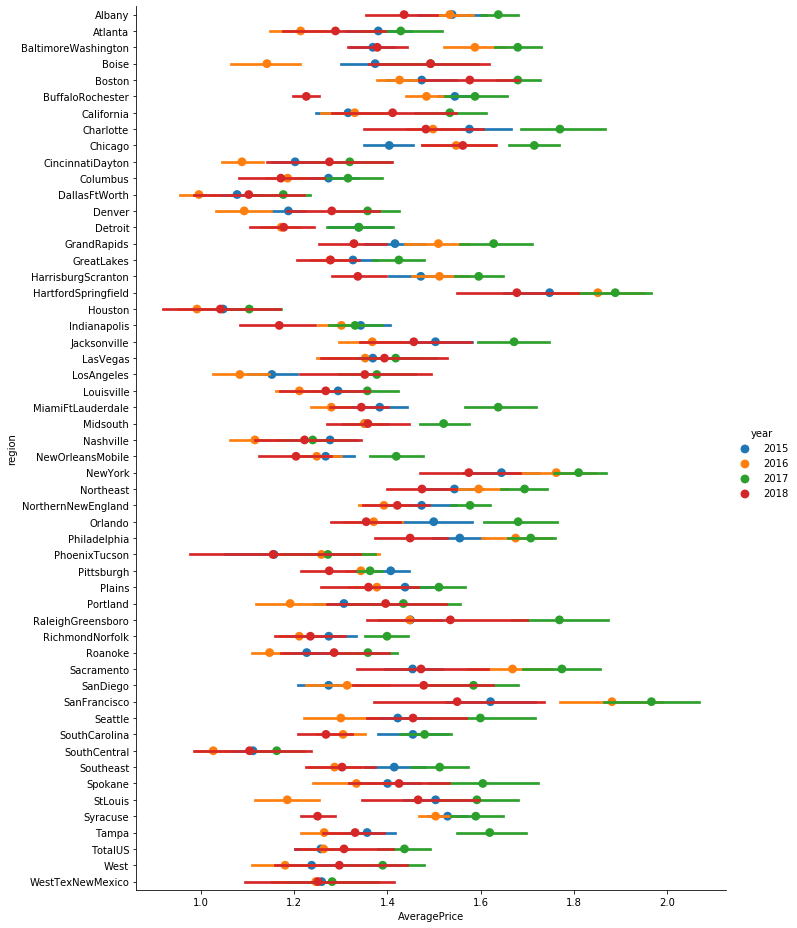

In [23]:
f = sns.catplot(data= df, 
               x= 'AveragePrice',
               y= 'region',
               hue= 'year',
               height = 13,
               aspect = 0.8,
               palette = None,
               kind='point',join=False)

Notes: 

    1 Date vs Average price
    2 which one sell the most small medium or larger ? 
    3 which one sell more org or con?
    4 which year sell the most?  (option: month)
    5 which region sale the most 
    6 Time series question 
    7 prediction 